# 911 Calls Project

For this project I will be analyzing 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
# Data and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import zipfile
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!kaggle datasets download -d mchirico/montcoalert

montcoalert.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extract the file from the downloaded zip file
zipfile_name = 'montcoalert.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [5]:
sns.set_style('whitegrid')
# init_notebook_mode(connected=True)
# cf.go_offline()

In [6]:
#Reading the csv file as a dataframe called df
df = pd.read_csv('911.csv')

# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
# Counting Null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [8]:
# Checking the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [9]:
zipdf = pd.DataFrame(df['zip'].value_counts(sort = True))
zipdf.reset_index(inplace = True)
zipdf.sort_values(by = 'count', ascending = False, inplace= True)

In [10]:
zipdf.head()

,zip,count
0,19401.0,45606
1,19464.0,43910
2,19403.0,34888
3,19446.0,32270
4,19406.0,22464


Text(0.5, 1.0, 'Count of ZIP Codes')

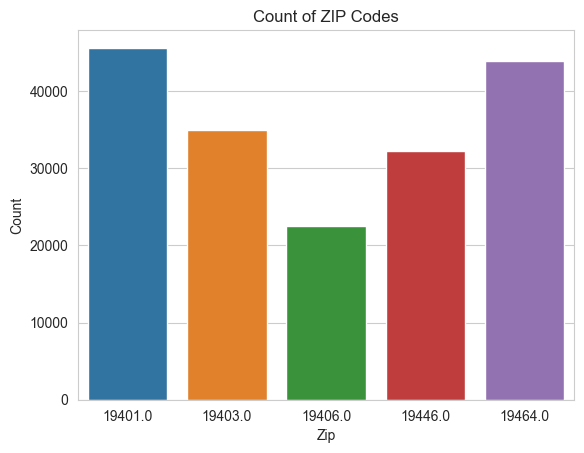

In [11]:
sns.barplot(data = zipdf.head(), x = 'zip', y = 'count') 
plt.xlabel("Zip")
plt.ylabel("Count")
plt.title('Count of ZIP Codes')

**What are the top 5 townships (twp) for 911 calls?**

In [12]:
df['twp'].value_counts(sort= True).head()

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

**How many unique title codes are there?**

In [13]:
df['title'].nunique()

148

## Creating new features

In [14]:
df['Reason'] = df['title'].apply(lambda x: x.split(":")[0])

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [16]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

In [17]:
# Creating a count plot for the Reason

Text(0.5, 1.0, 'Bar chart showing count of calls Vs different reasons')

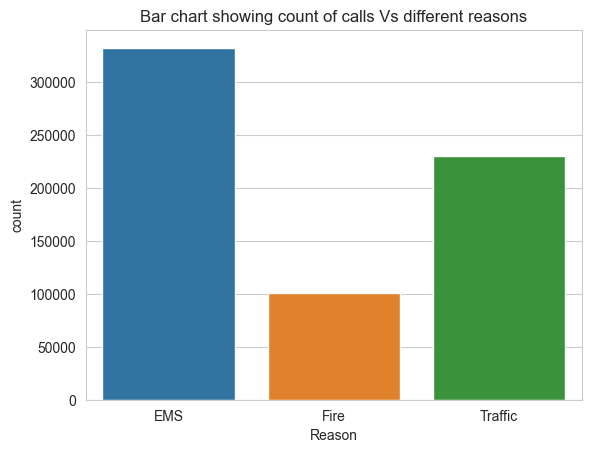

In [18]:
sns.countplot(data= df,x='Reason')
plt.title("Bar chart showing count of calls Vs different reasons")

**Converting the 'timeStamp' column from strings to DateTime objects.**

In [19]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [20]:
df['timeStamp'][0]

Timestamp('2015-12-10 17:10:52')

In [21]:
df['Hour']= df['timeStamp'].apply(lambda x:x.hour)

In [22]:
df['Month']= df['timeStamp'].apply(lambda x:x.month)

In [23]:
df['Day of Week']= df['timeStamp'].apply(lambda x:x.day_of_week)

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda x:dmap[x])

**Countplot of the Day of Week column with the hue based off of the Reason column.**

Text(0.5, 1.0, 'Day of Week Vs Reason')

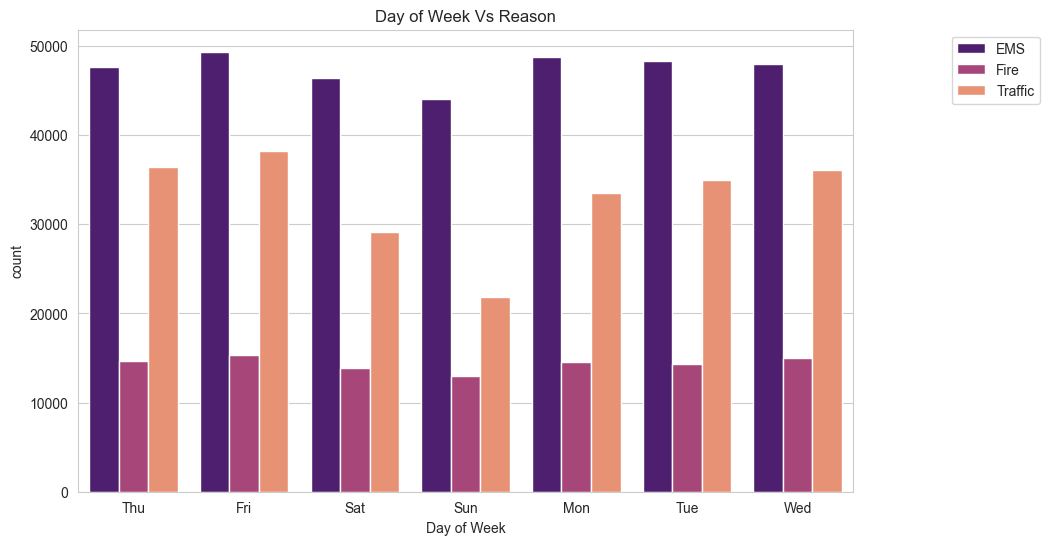

In [25]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Day of Week', hue= 'Reason',palette='magma')
plt.legend(loc ='upper right', bbox_to_anchor=(1.25,1),frameon=True)
plt.title("Day of Week Vs Reason")

**Doing the same for Month:**

Text(0.5, 1.0, 'Month Vs Reason')

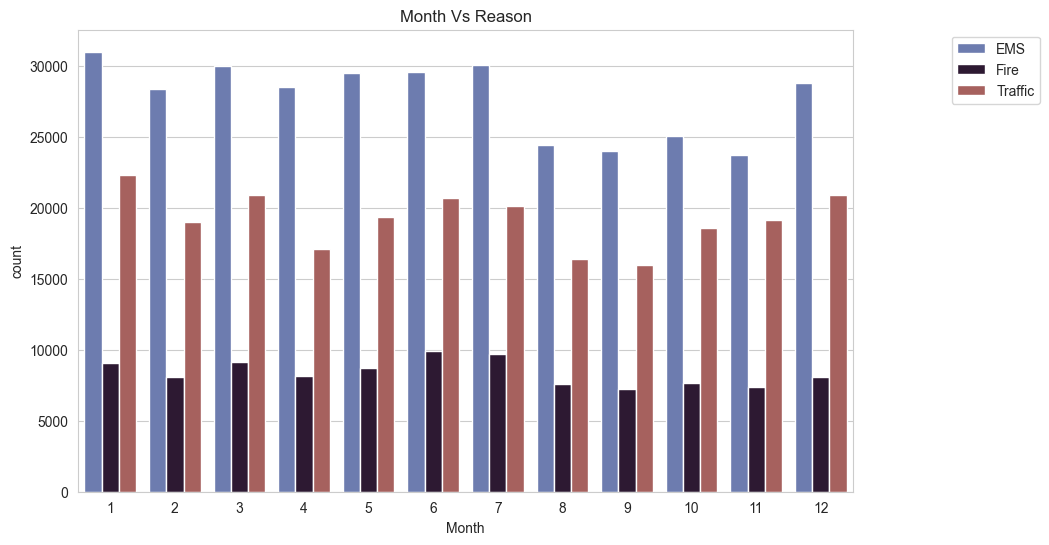

In [26]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Month', hue= 'Reason',palette='twilight')
plt.legend(loc ='upper right', bbox_to_anchor=(1.25,1),frameon=True)
plt.title("Month Vs Reason")

In [27]:
byMonth = df.groupby(by = 'Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Creating a simple plot off of the dataframe indicating the count of calls per month.**

Text(0.5, 1.0, 'Variation of calls with month')

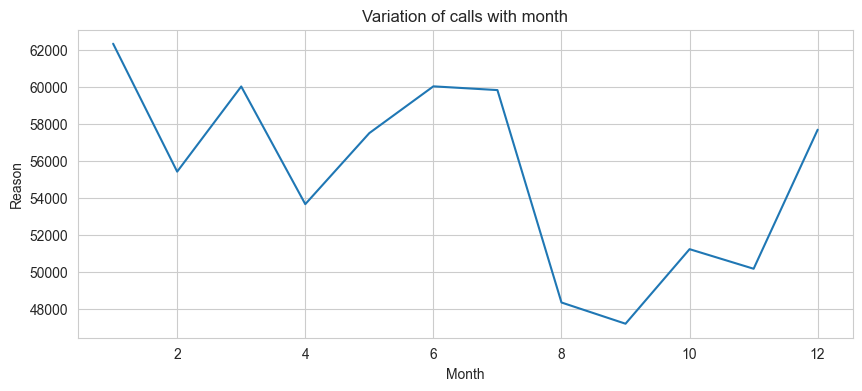

In [28]:
sns.set_style(style = 'whitegrid')
fig = plt.figure(figsize=(10,4))
sns.lineplot(data=byMonth, x='Month',y="Reason")
plt.title("Variation of calls with month")

**Creating a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

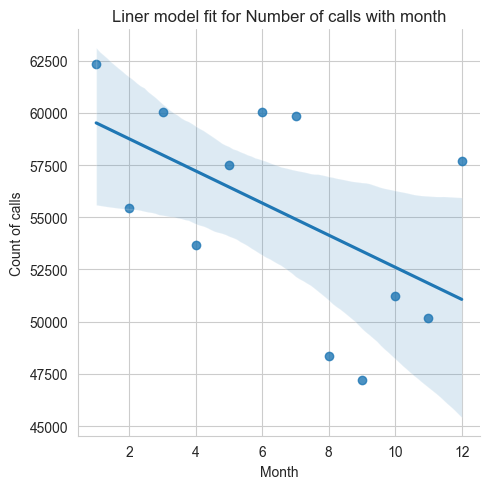

In [29]:
sns.lmplot(data=byMonth.reset_index(),x='Month',y='Reason')
plt.ylabel("Count of calls")
plt.title("Liner model fit for Number of calls with month")
plt.tight_layout()

**Creating a new column called 'Date' that contains the date from the timeStamp column** 

In [30]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [31]:
gbdate= df.groupby(by='Date').count()

In [32]:
gbdate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


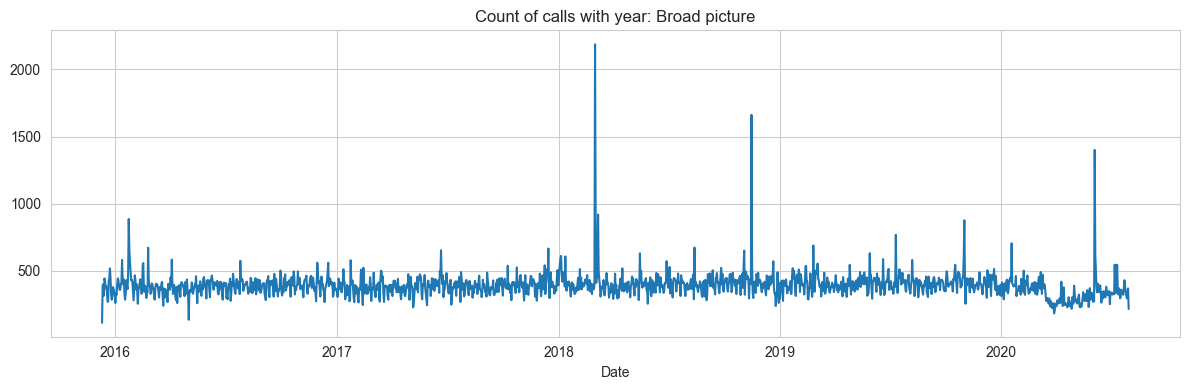

In [33]:
fig = plt.figure(figsize = (12,4))
gbdate['Hour'].plot()
plt.title("Count of calls with year: Broad picture")
plt.tight_layout()

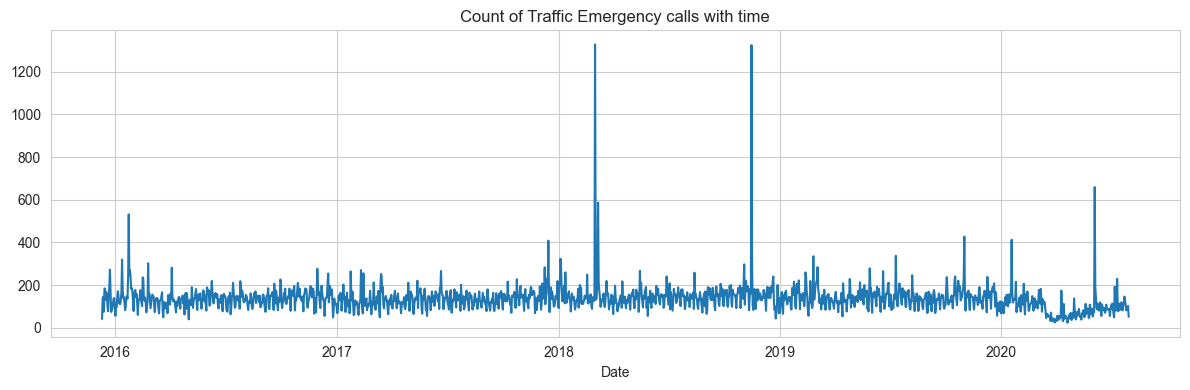

In [34]:
gbdatetra= df[df['Reason']=='Traffic'].groupby(by='Date').count()
fig = plt.figure(figsize = (12,4))
gbdatetra['Hour'].plot()
plt.title("Count of Traffic Emergency calls with time")
plt.tight_layout()

Text(0.5, 1.0, 'EMS')

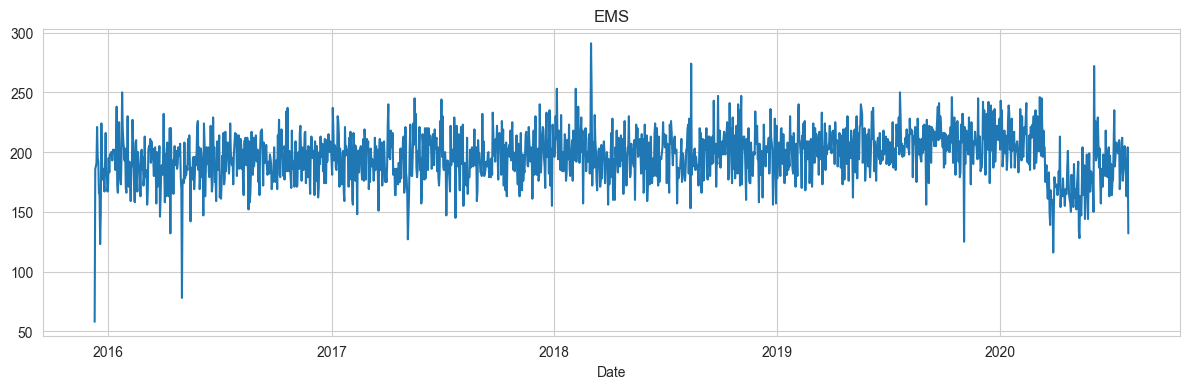

In [35]:
gbdatetra= df[df['Reason']=='EMS'].groupby(by='Date').count()
fig = plt.figure(figsize = (12,4))
gbdatetra['Hour'].plot()
plt.title("Count of Emergency Medical Services(EMS) calls with time")
plt.tight_layout()
plt.title("EMS")


In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [37]:
# Creating pivot-table for Day of week
pivtable = df.pivot_table(values='Reason', index= 'Day of Week', columns='Hour',aggfunc='count')
pivtable

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


**Creating a HeatMap**

Text(0.5, 1.0, 'Count of cases during a Day of week and Hour Heatmap')

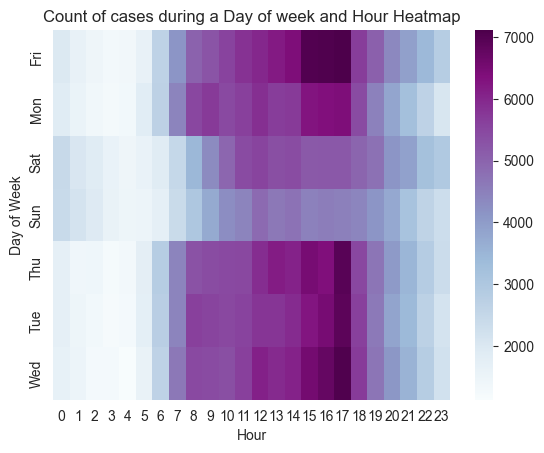

In [38]:
sns.heatmap(pivtable, cmap= 'BuPu')
plt.title("Count of cases during a Day of week and Hour Heatmap")

In [39]:
pivtablem = df.pivot_table(values='Reason', index= 'Day of Week', columns='Month',aggfunc='count')
pivtablem

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


Text(0.5, 1.0, 'Count of cases during a Day of week and Month Clustermap')

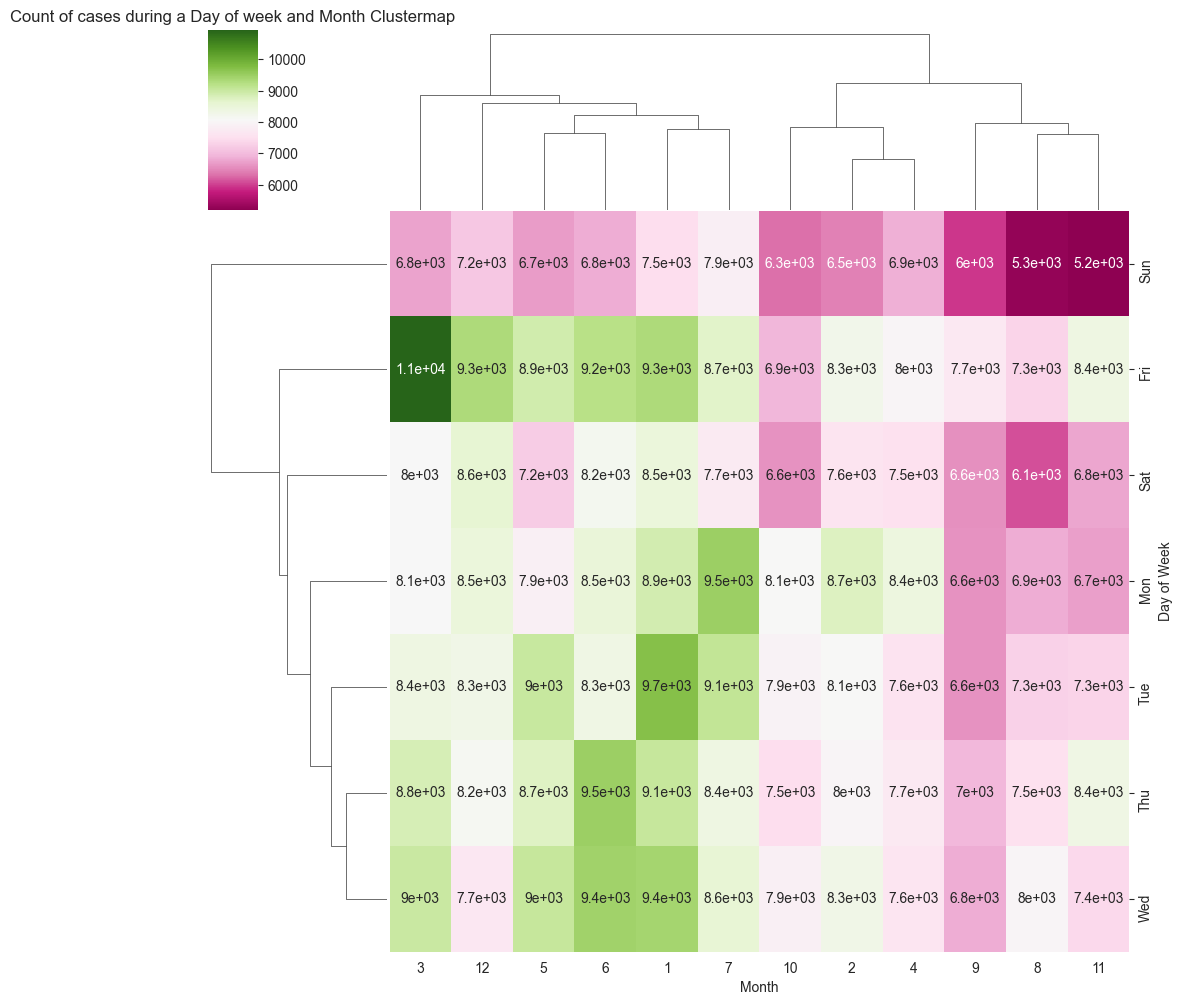

In [40]:
sns.clustermap(pivtablem, cmap = 'PiYG', annot= True)
plt.title("Count of cases during a Day of week and Month Clustermap")

# Thank you!